In [1]:
# Interactive Jupyter Notebook
import matplotlib.pyplot as plt

import nltk
#nltk.download('punkt') # Frequency Distribution
nltk.download('stopwords') # Stopwords for cleanup

[nltk_data] Error loading stopwords: <urlopen error [Errno 111]
[nltk_data]     Connection refused>


False

In [2]:
# Enable exntesions to display interactive widgets on the notebook
!jupyter nbextension enable - py widgetsnbextension - sys-prefix
!jupyter serverextension enable viola -sys-prefix

Please specify one nbextension/package at a time
usage: jupyter-serverextension [-h] [--debug] [--show-config]
                               [--show-config-json] [--user] [--system]
                               [--sys-prefix] [--py] [--python]
                               [--log-level EnableServerExtensionApp.log_level]
                               [--config EnableServerExtensionApp.config_file]
                               [extra_args [extra_args ...]]
jupyter-serverextension: error: unrecognized arguments: -sys-prefix


In [3]:
# Interactive imports
import ipywidgets as widgets 
from IPython.display import display, clear_output

most_frequency_slider = widgets.IntSlider(value=22, 
                                          min=1, 
                                          max=100,
                                          step=1, 
                                          style={"description_width": "initial"})
user_defined_stopwords_text_box = widgets.Text(value="the, and, a, in",
                                               placeholder="add words to be removed, seperated by commas")

button_send = widgets.Button(description="send button description", 
                             tooltip="send button tooltip",
                             style={"description_width": "initial"})

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print("Button selected send button")
        print("Most frequenct selected = {0}\nUser-Defined Stopwords = {1}".format(most_frequency_slider.value, user_defined_stopwords_text_box.name.split(",")))
        
    button_send.on_click(on_button_clicked)
    vbox_result = widgets.VBox([button_send, output])

In [4]:
# User parameters
most_freq_amount = most_frequency_slider.value
print(most_freq_amount)
input_file = "orwell_1984.txt"
user_defined_stopwords_to_remove = (user_defined_stopwords_text_box.value).replace(" ", "").split(",")
print(user_defined_stopwords_to_remove)

22
['the', 'and', 'a', 'in']


In [5]:
# Return the text file as tokens
filename = input_file.split(".")[0]
with open(input_file, "r") as f:
	file_text = f.readlines()
file_text = " ".join(file_text) # combine all lines into one string

# Break into Tokens and Clean-up
string_as_tokens_list = nltk.word_tokenize(file_text)
print("Token list with stopwords: {0}".format(len(string_as_tokens_list)))
stopwords = nltk.corpus.stopwords.words("english")
string_as_tokens_list = [w for w in string_as_tokens_list if w not in stopwords] # remove stopwords
punctuation = ["--", "'", "''", "``", "?", "!", ".", ",", ";", ")", "(", "‘", "●", ":", '“', '”', '○', "[", "]", "&", '’', "%", "*", "–", "·", "-"]
string_as_tokens_list = [w.lower() for w in string_as_tokens_list if w not in punctuation] # remove punctuation
print("Token list without stopwords: {0}".format(len(string_as_tokens_list)))

Token list with stopwords: 119980
Token list without stopwords: 56018


In [6]:
# User defined stopwords
string_as_tokens_list = [u for u in string_as_tokens_list if u not in user_defined_stopwords_to_remove] # removes
print("Token list without user defined stopwords: {0}".format(len(string_as_tokens_list)))

Token list without user defined stopwords: 54893


{'he': 650, 'winston': 522, 'it': 491, 'i': 487, 'could': 431, 'one': 427, "'s": 415, 'would': 362, 'said': 341, 'even': 306, 'party': 289, 'but': 221, 'like': 206, "o'brien": 205, 'time': 199, 'face': 194, 'there': 193, 'thought': 187, 'seemed': 173, 'never': 173, 'they': 172, "n't": 168}


Text(0, 0.5, 'Occurrence')

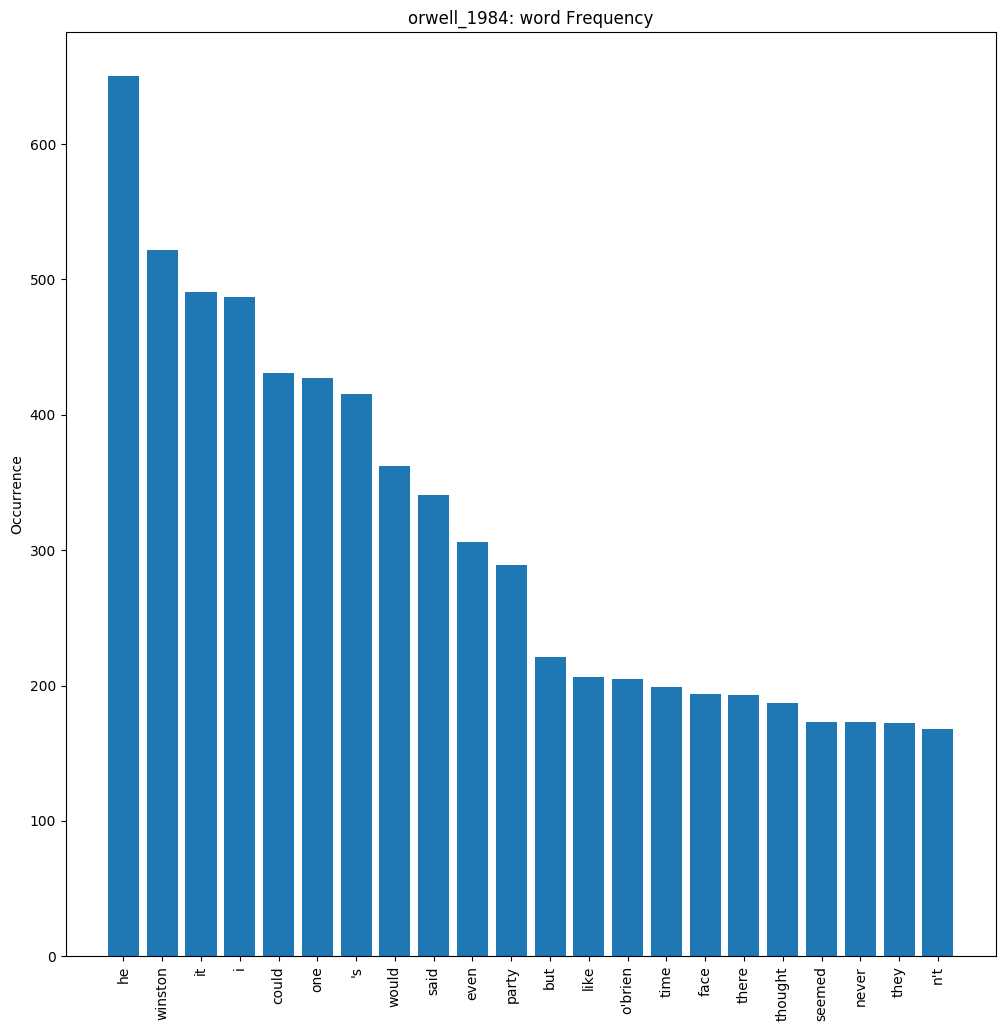

In [7]:
# Frequency Distribution
frequency_dist = nltk.FreqDist(string_as_tokens_list)
frequencyDistribution_as_dict = dict(frequency_dist.most_common(most_freq_amount)) # convert to dict for plotting
print(frequencyDistribution_as_dict)

fig = plt.figure(figsize=(12,12), dpi=100)
plt.title("{0}: word Frequency".format(filename))
plt.bar(frequencyDistribution_as_dict.keys(), frequencyDistribution_as_dict.values())
plt.xticks(rotation=90)
plt.ylabel("Occurrence")

In [8]:
# Collocation Distribution
def plotNGram(n_gram_amount, n_gram_finder):
	# Plot N-Grams
	nGram_as_dict_temp = dict(n_gram_finder.ngram_fd.most_common(most_freq_amount)) # convert to dict for plotting

	nGram_as_dict = {}
	for k, v in nGram_as_dict_temp.items():
		nGram_as_dict[", ".join(k)] = v # rename key from ('graduate', 'division') to "graduate, division"
	print(nGram_as_dict)

	fig = plt.figure(figsize=(12,12), dpi=100)
	fig.subplots_adjust(bottom=0.3)
	plt.title("{0}: {1}".format(filename, n_gram_amount))
	plt.bar(nGram_as_dict.keys(), nGram_as_dict.values())
	plt.xticks(rotation=90)
	plt.ylabel("Occurrence")

{'big, brother': 78, "winston, 's": 68, 'said, winston': 46, "i, 'm": 41, 'thought, police': 40, 'old, man': 39, "said, o'brien": 37, 'one, another': 36, "i, n't": 36, "one, 's": 34, 'inner, party': 30, "o'brien, 's": 28, 'he, could': 27, 'party, member': 27, 'he, knew': 25, "'it, 's": 25, "ca, n't": 25, 'years, ago': 23, 'could, see': 21, "it, 's": 21, "i, 'll": 21, "i, 've": 21}


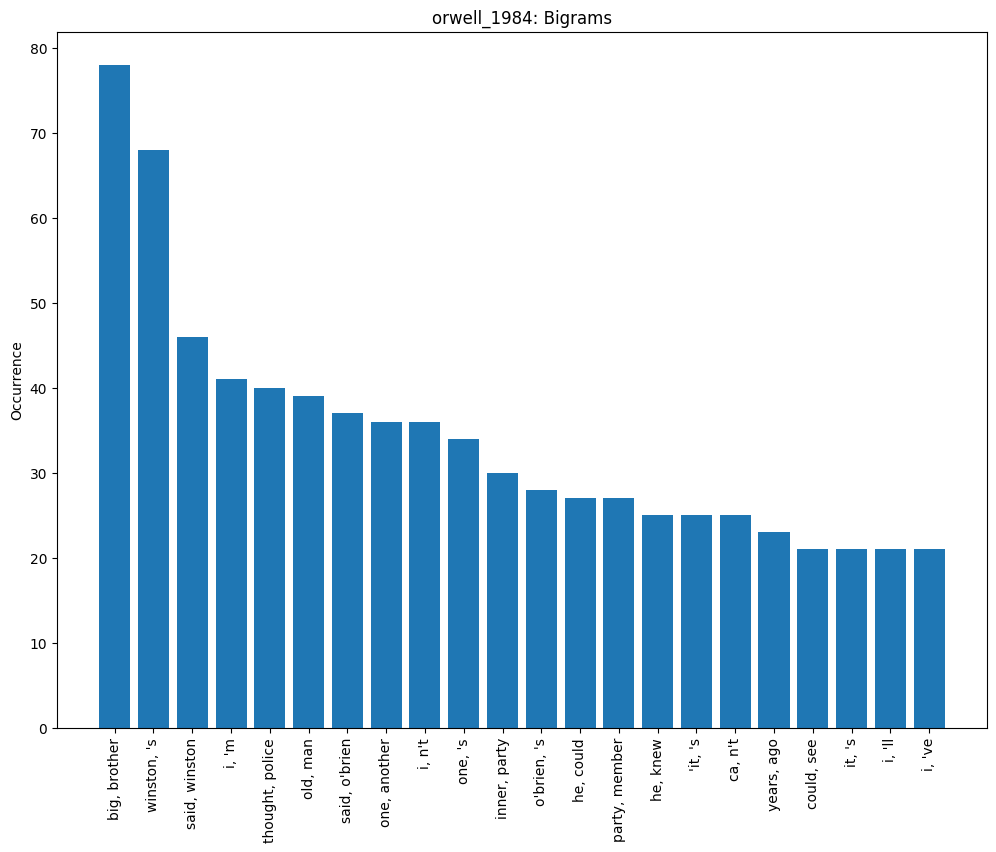

In [9]:
# Bigrams: Two-Word Combinations
bigram_collocation_dist = nltk.collocations.BigramCollocationFinder.from_words(string_as_tokens_list)
plotNGram("Bigrams", bigram_collocation_dist)

{'two, minutes, hate': 13, "i, n't, know": 13, 'say, bells, st': 12, "mr, charrington, 's": 9, 'man, white, coat': 9, 'junior, anti-sex, league': 8, 'said, old, man': 8, 'lemons, say, bells': 8, 'bells, st, clement': 8, "st, clement, 's": 8, 'down, with, big': 7, 'with, big, brother': 7, 'jones, aaronson, rutherford': 7, "i, 've, got": 7, "i, 'm, going": 7, "'room, 101, said": 7, "'how, many, fingers": 7, 'member, inner, party': 6, 'girl, dark, hair': 6, 'oceania, war, eastasia': 6, "big, brother, 's": 6, 'i, dare, say': 6}


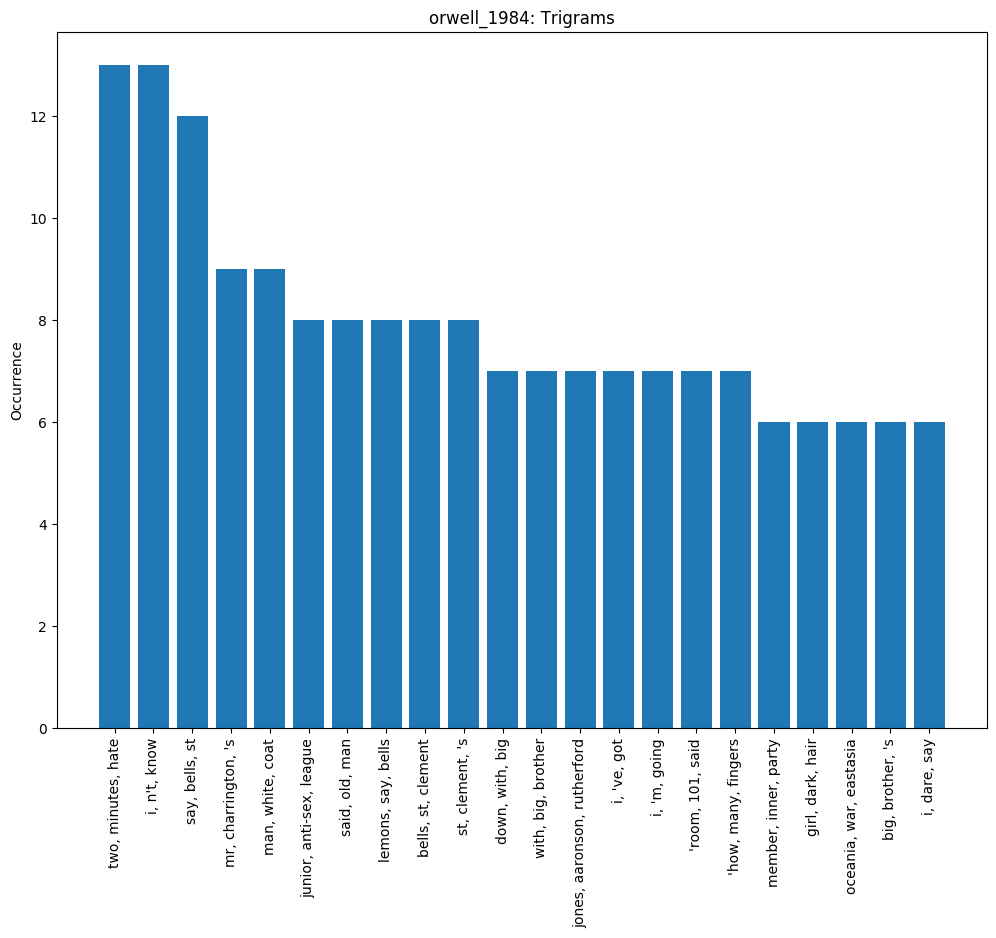

In [10]:
# Trigrams: Three-Word Combinations
trigram_collocation_dist = nltk.collocations.TrigramCollocationFinder.from_words(string_as_tokens_list)
plotNGram("Trigrams", trigram_collocation_dist)

{'lemons, say, bells, st': 8, 'say, bells, st, clement': 8, "bells, st, clement, 's": 8, 'down, with, big, brother': 7, 'oranges, lemons, say, bells': 6, "mr, charrington, 's, shop": 6, 'owe, three, farthings, say': 5, "'how, many, fingers, winston": 5, 'war, is, peace, freedom': 4, 'is, peace, freedom, is': 4, 'peace, freedom, is, slavery': 4, 'freedom, is, slavery, ignorance': 4, 'is, slavery, ignorance, is': 4, 'slavery, ignorance, is, strength': 4, 'with, big, brother, down': 4, 'big, brother, down, with': 4, 'brother, down, with, big': 4, "'we, shall, meet, place": 4, 'shall, meet, place, darkness': 4, 'one, two, three, four': 4, 'comes, chopper, chop, head': 4, "st, clement, 's, you": 4}


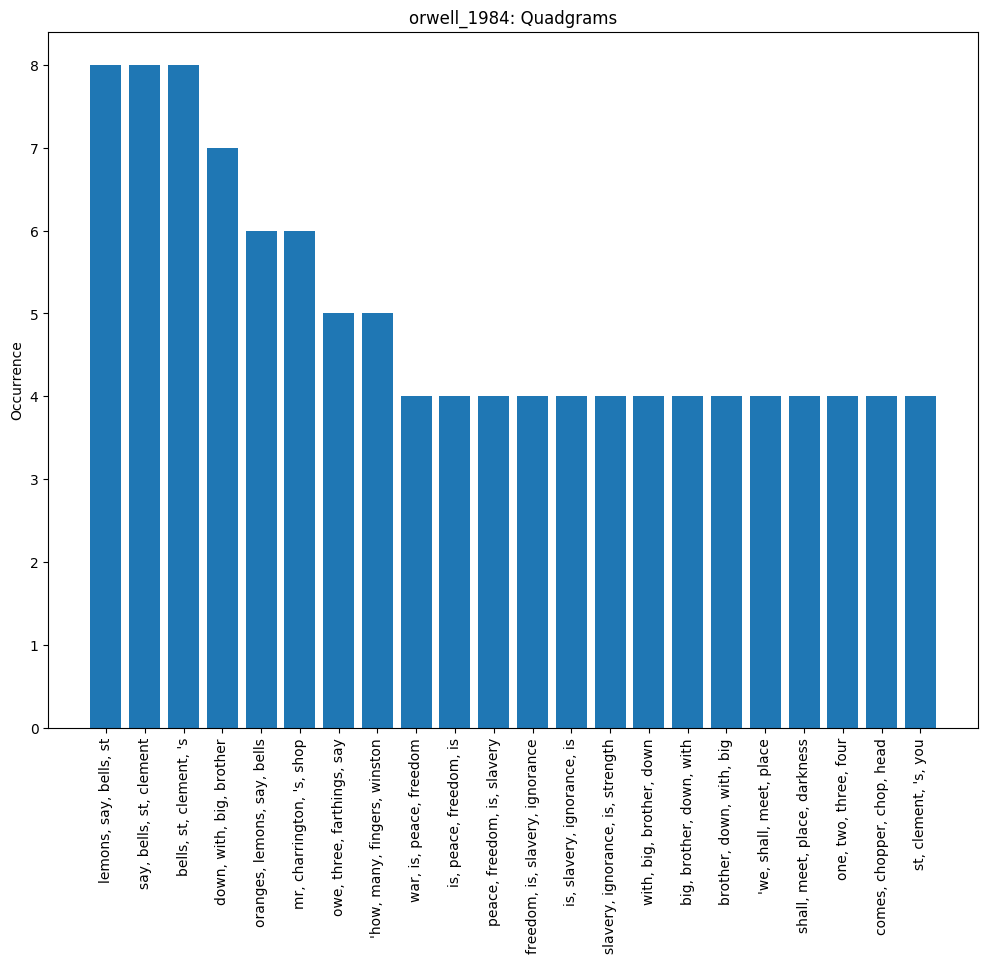

In [11]:
# Quadgrams: Four-Word Combinations
quadgram_collocation_dist = nltk.collocations.QuadgramCollocationFinder.from_words(string_as_tokens_list)
plotNGram("Quadgrams", quadgram_collocation_dist)

## TODO:

Run viola interactive web application with jupyter notebook that uses graphs